## Caravan Insurance KNN

In [2]:
library(ISLR)

### Reading and Understanding data

In [3]:
head(Caravan)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
6,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,No


In [4]:
str(Caravan)

'data.frame':	5822 obs. of  86 variables:
 $ MOSTYPE : num  33 37 37 9 40 23 39 33 33 11 ...
 $ MAANTHUI: num  1 1 1 1 1 1 2 1 1 2 ...
 $ MGEMOMV : num  3 2 2 3 4 2 3 2 2 3 ...
 $ MGEMLEEF: num  2 2 2 3 2 1 2 3 4 3 ...
 $ MOSHOOFD: num  8 8 8 3 10 5 9 8 8 3 ...
 $ MGODRK  : num  0 1 0 2 1 0 2 0 0 3 ...
 $ MGODPR  : num  5 4 4 3 4 5 2 7 1 5 ...
 $ MGODOV  : num  1 1 2 2 1 0 0 0 3 0 ...
 $ MGODGE  : num  3 4 4 4 4 5 5 2 6 2 ...
 $ MRELGE  : num  7 6 3 5 7 0 7 7 6 7 ...
 $ MRELSA  : num  0 2 2 2 1 6 2 2 0 0 ...
 $ MRELOV  : num  2 2 4 2 2 3 0 0 3 2 ...
 $ MFALLEEN: num  1 0 4 2 2 3 0 0 3 2 ...
 $ MFGEKIND: num  2 4 4 3 4 5 3 5 3 2 ...
 $ MFWEKIND: num  6 5 2 4 4 2 6 4 3 6 ...
 $ MOPLHOOG: num  1 0 0 3 5 0 0 0 0 0 ...
 $ MOPLMIDD: num  2 5 5 4 4 5 4 3 1 4 ...
 $ MOPLLAAG: num  7 4 4 2 0 4 5 6 8 5 ...
 $ MBERHOOG: num  1 0 0 4 0 2 0 2 1 2 ...
 $ MBERZELF: num  0 0 0 0 5 0 0 0 1 0 ...
 $ MBERBOER: num  1 0 0 0 4 0 0 0 0 0 ...
 $ MBERMIDD: num  2 5 7 3 0 4 4 2 1 3 ...
 $ MBERARBG: num  5 0 0 

In [5]:
summary(Caravan$Purchase)

No  Yes 
5474  348

### Checking for Missing Values

In [6]:
any(is.na(Caravan))

[1] FALSE

### Feature Scaling

In [7]:
var(Caravan[,1])

[1] 165.0378

In [8]:
var(Caravan[,2])

[1] 0.1647078

In [9]:
purchase <- Caravan[,86]

standardized.Caravan <- scale(Caravan[,-86])

In [11]:
var(standardized.Caravan[,1])
var(standardized.Caravan[,2])

[1] 1

[1] 1

### Splitting Dataset 

In [12]:
test.index <- 1:1000
test.data <- standardized.Caravan[test.index,]
test.purchase <- purchase[test.index]

train.data <- standardized.Caravan[-test.index,]
train.purchase <- purchase[-test.index]

### Building the KNN Model

In [13]:
library(class)

In [14]:
set.seed(101)

In [15]:
predicted.purchase <- knn(train.data, test.data, train.purchase, k=1)
head(predicted.purchase)

[1] No No No No No No
Levels: No Yes

### Evaluating the model

In [16]:
misclass.error <- mean(test.purchase != predicted.purchase)
misclass.error

[1] 0.116

### Choosing K value with elbow method

In [17]:
predicted.purchase <- NULL
error.rate <- NULL

for(i in 1:20){
    set.seed(101)
    predicted.purchase <- knn(train.data, test.data, train.purchase, k=i)
    error.rate[i] <- mean(test.purchase != predicted.purchase)
}

error.rate

[1] 0.116 0.107 0.074 0.070 0.066 0.064 0.062 0.061 0.058 0.058 0.059 0.058
[13] 0.059 0.059 0.059 0.059 0.059 0.059 0.059 0.059

#### Visualizing K

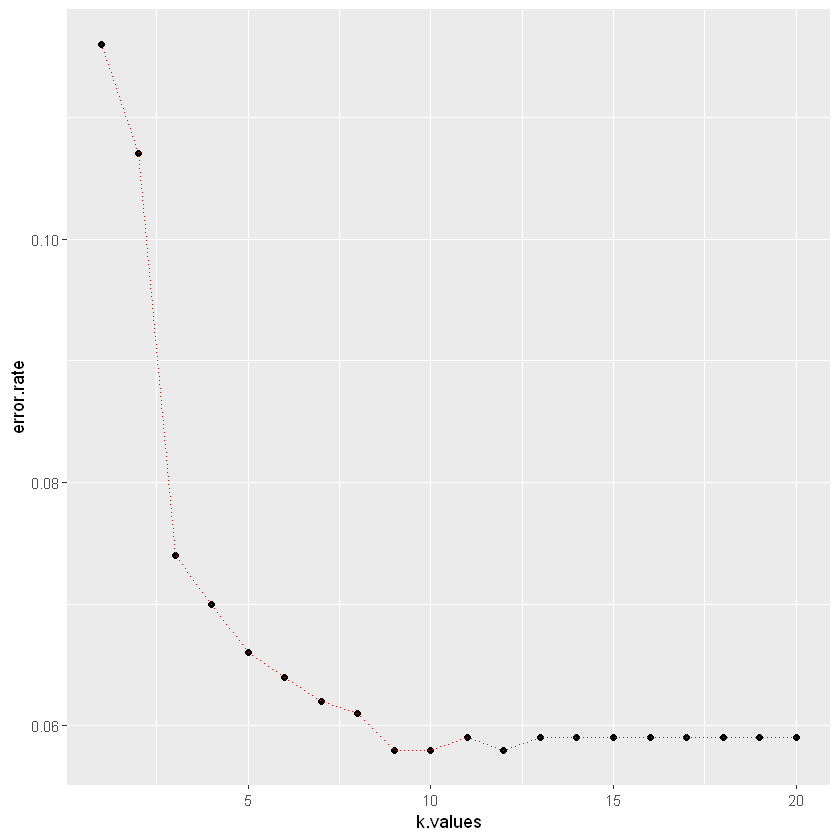

In [19]:
library(ggplot2)
k.values <- 1:20
error.df <- data.frame(error.rate, k.values)

ggplot(error.df, aes(k.values,error.rate)) + geom_point() + geom_line(lty='dotted',color='red')

## END!!!